In [1]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [2]:
path = "/Users/Bingumalla Likith/Desktop/Projects/Machine_learning_projects/Brain_Tumor_dataset"
def extract_data(path):
    list_dir = os.listdir(path)
    test_images = []
    test_labels = []
    train_images = []
    train_labels = []

    for dir in list_dir:
        sub_dir = os.listdir(path + '/' + dir)
        for subdir in sub_dir:
            list_of_images = os.listdir(path + '/' + dir + '/' + subdir)
            for images in list_of_images:
                img = cv2.imread(path + '/' + dir + '/' + subdir + '/' + images)
                img = cv2.resize(img , (64 , 64))
                img = img / 255
                img = np.array(img)
                if dir == 'Training':
                    train_images.append(img.reshape(-1))
                    if subdir == 'no_tumor':
                        train_labels.append(0)
                    else:
                        train_labels.append(1)
                else:
                    test_images.append(img.reshape(-1))
                    if subdir == 'no_tumor':
                        test_labels.append(0)
                    else:
                        test_labels.append(1)
    return np.array(train_images) , np.array(train_labels , ndmin = 1) , np.array(test_images) , np.array(test_labels , ndmin = 1)

# 1 = tumor and 0 = no_tumor
x_train , y_train , x_test , y_test = extract_data(path)

In [3]:
x_train , x_val , y_train , y_val = train_test_split(x_train , y_train , test_size=0.2)

In [4]:
x_train.shape , y_train.shape , x_test.shape , y_test.shape

((2296, 12288), (2296,), (394, 12288), (394,))

(-0.5, 63.5, 63.5, -0.5)

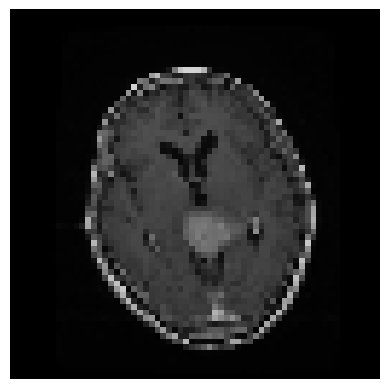

In [5]:
# Sample Image
ind = np.random.randint(100)
plt.imshow(x_train[ind].reshape(64, 64 ,3) , cmap = 'binary' , interpolation='nearest')
plt.axis('off')

In [6]:
svc_clf = SVC()
C_val = np.random.uniform(0.0001 , 1 , 20)
coef_val = np.random.uniform(0.0001 , 1 , 20)
params = [{'C' : C_val ,'coef0' : coef_val , 'kernel' : ['linear' , 'poly' , 'rbf'] , 'random_state' : [42]}]
model = RandomizedSearchCV(svc_clf , params , scoring = 'accuracy' , cv = 10 , return_train_score = True , verbose = 3)
model.fit(x_train , y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
[CV 1/10] END C=0.5845607849867404, coef0=0.22837741995352187, kernel=poly, random_state=42;, score=(train=0.991, test=0.952) total time=  11.9s
[CV 2/10] END C=0.5845607849867404, coef0=0.22837741995352187, kernel=poly, random_state=42;, score=(train=0.992, test=0.930) total time=  11.3s
[CV 3/10] END C=0.5845607849867404, coef0=0.22837741995352187, kernel=poly, random_state=42;, score=(train=0.991, test=0.913) total time=  10.8s
[CV 4/10] END C=0.5845607849867404, coef0=0.22837741995352187, kernel=poly, random_state=42;, score=(train=0.991, test=0.939) total time=  11.3s
[CV 5/10] END C=0.5845607849867404, coef0=0.22837741995352187, kernel=poly, random_state=42;, score=(train=0.992, test=0.939) total time=  11.0s
[CV 6/10] END C=0.5845607849867404, coef0=0.22837741995352187, kernel=poly, random_state=42;, score=(train=0.992, test=0.900) total time=  10.8s
[CV 7/10] END C=0.5845607849867404, coef0=0.22837741995352187, kern

RandomizedSearchCV(cv=10, estimator=SVC(),
                   param_distributions=[{'C': array([0.87466605, 0.24745071, 0.78784421, 0.50423576, 0.31869603,
       0.58456078, 0.31088689, 0.59905148, 0.22852195, 0.56397849,
       0.03911932, 0.27236851, 0.25971047, 0.16865437, 0.17209389,
       0.29860558, 0.68984597, 0.11789585, 0.22315547, 0.18352735]),
                                         'coef0': array([0.1767476 , 0.75631807, 0.50896766, 0.76491732, 0.6174602 ,
       0.77368263, 0.14264613, 0.09894735, 0.20870498, 0.27449232,
       0.22837742, 0.43568876, 0.76086412, 0.07050437, 0.3832936 ,
       0.51652564, 0.44770312, 0.59632017, 0.47495498, 0.39607493]),
                                         'kernel': ['linear', 'poly', 'rbf'],
                                         'random_state': [42]}],
                   return_train_score=True, scoring='accuracy', verbose=3)

In [7]:
best_model = model.best_estimator_
best_model.fit(x_train , y_train)

SVC(C=0.3108868945697441, coef0=0.7649173241171315, kernel='poly',
    random_state=42)

C=0.3108868945697441, coef0=0.7649173241171315, kernel='poly', random_state=42
Gives 99% training accuracy , Validation accuracy 95%

In [8]:
predict_train = best_model.predict(x_train)
print(f"The training accuracy is : {accuracy_score(y_train , predict_train)}")


The training accuracy is : 0.9912891986062717


In [12]:
predict_val = best_model.predict(x_val)
print(f'The Validation accuracy is : {accuracy_score(predict_val , y_val)}')

The Validation accuracy is : 0.9529616724738676


In [19]:
new_x_train = np.r_[x_train , x_val]
new_y_train = np.r_[y_train , y_val]
best_model.fit(new_x_train , new_y_train)

SVC(C=0.3108868945697441, coef0=0.7649173241171315, kernel='poly',
    random_state=42)

In [20]:
predict_test = best_model.predict(x_test)
print(f'The Validation accuracy is : {accuracy_score(predict_test , y_test)}')

The Validation accuracy is : 0.8604060913705583


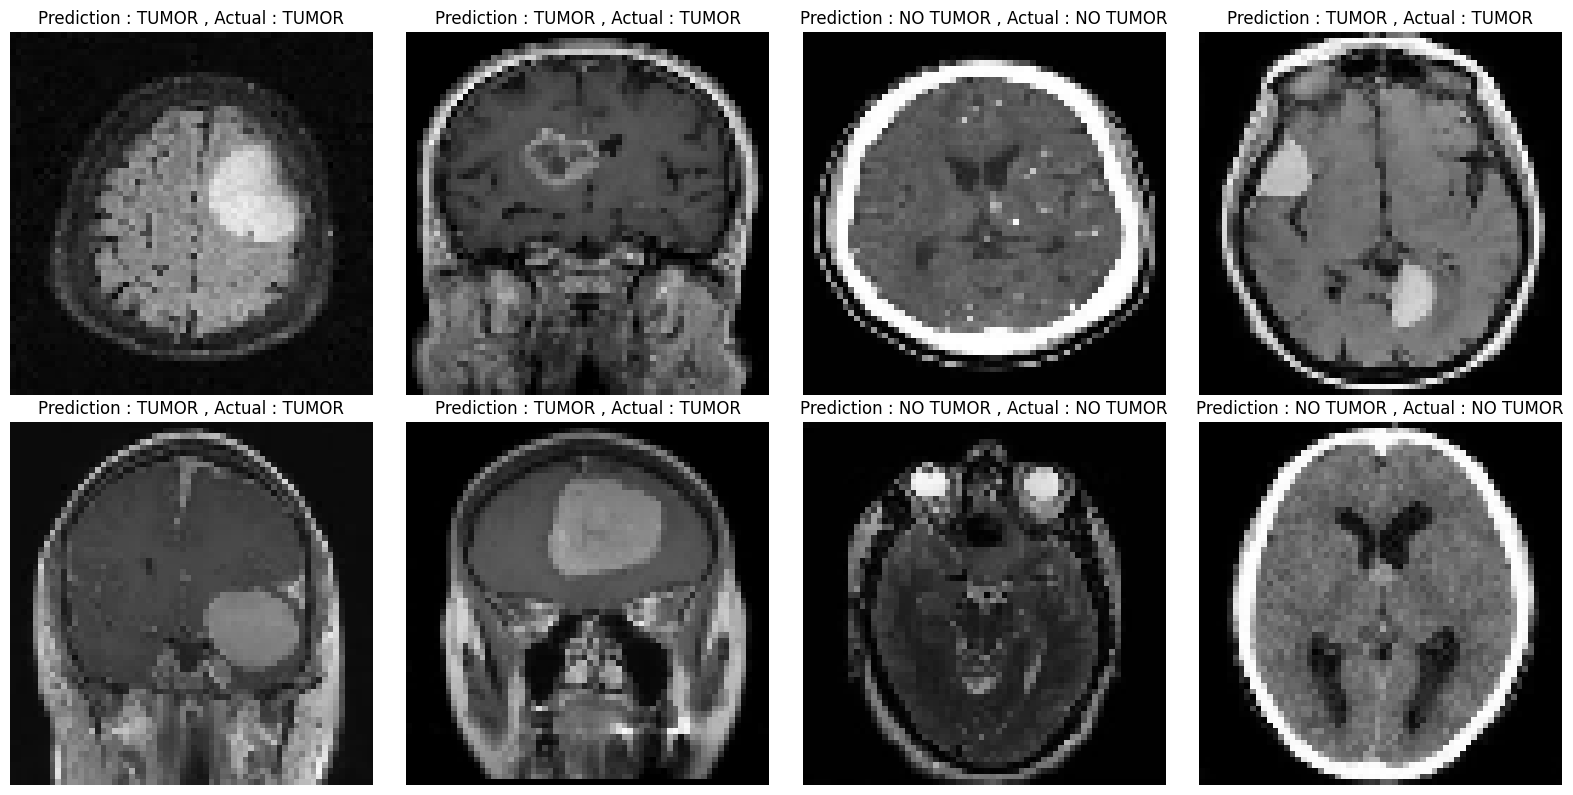

In [24]:
fig , ax = plt.subplots(nrows = 2 , ncols = 4 , figsize = (16 , 8))
indices = np.random.randint(1 , 394 , size = (8))
for i in range(8):
    predict = best_model.predict(x_test[indices[i]].reshape(1 , -1))
    ax[i//4 , i % 4].imshow(x_test[indices[i]].reshape(64 , 64 , 3) , cmap = 'binary' , interpolation = 'nearest')
    ax[i//4 , i % 4].axis('off')
    if predict[0]:
        if y_test[indices[i]]:
            ax[i//4 , i%4].set_title(f'Prediction : TUMOR , Actual : TUMOR')
        else:
            ax[i//4 , i%4].set_title(f'Prediction : TUMOR , Actual : NO TUMOR')
    else:
        if y_test[indices[i]]:
            ax[i//4 , i%4].set_title(f'Prediction : NO TUMOR , Actual : TUMOR')
        else:
            ax[i//4 , i%4].set_title(f'Prediction : NO TUMOR , Actual : NO TUMOR')
plt.tight_layout()
plt.show()